In [1]:
# Подключить библиотеки
from numpy import *
from scipy import optimize
from scipy import stats
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper')

# Тест 1

In [58]:
# Считать данные из файла
dataTest1 = pd.read_table('test1.txt', sep=',', names=['Var1', 'Var2'])

# Вывести часть данных для проверки корректности загрузки
print(dataTest1.head())

         Var1        Var2
0 -124.000000  371.000000
1  -50.440043  283.987200
2  -83.880341  140.948802
3   41.678848  210.884809
4   11.237270  205.795227


In [59]:
# Вывести статистику
dataTest1.describe()

,Var1,Var2
count,768.000000,768.000000
mean,22.202164,35.043174
std,189.440636,195.508760
min,-380.709903,-381.563463
25%,-137.628701,-130.976002
50%,48.838103,55.519427
75%,171.116709,194.881794
max,377.741338,379.994056


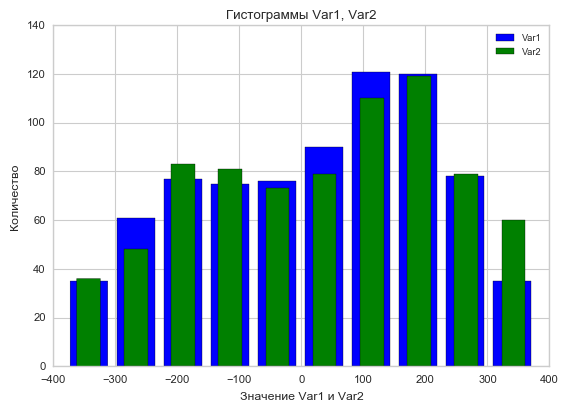

In [60]:
# Вывести гистограммы распределений Var1 и Var2
fig, ax = plt.subplots()
ax.hist(dataTest1.Var1, rwidth=0.8, color='blue')
ax.hist(dataTest1.Var2, rwidth=0.5, color='green')
ax.set_title('Гистограммы Var1, Var2')
ax.set_xlabel('Значение Var1 и Var2')
ax.set_ylabel('Количество')
ax.legend(['Var1', 'Var2'], fontsize='x-small')

Количество точек, где Var1 и Var2 положительны, больше.

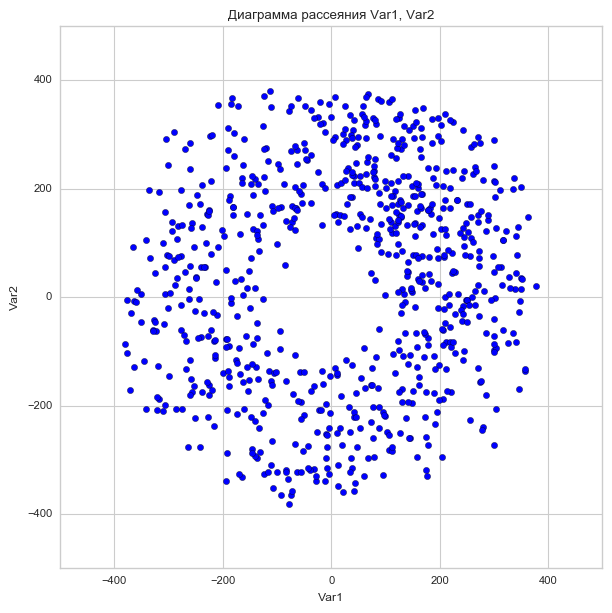

In [61]:
# Вывести диаграмму рассеяния Var1, Var2
plt.figure(figsize=(7, 7))
plt.scatter(dataTest1.Var1, dataTest1.Var2)
plt.xlabel('Var1')
plt.ylabel('Var2')
plt.title('Диаграмма рассеяния Var1, Var2')

Диаграмма рассеяния визуально похожа на случайное распределение точек вокруг линии окружности.

In [62]:
# Определить параметры окружности 
def calc_R(c1, c2):
    return sqrt((dataTest1.Var1 - c1)**2 + (dataTest1.Var2 - c2)**2)

def fMin(prm):
    R_i = calc_R(*prm)
    return R_i - R_i.mean()

center, ier = optimize.leastsq(fMin, (mean(dataTest1.Var1), mean(dataTest1.Var2)))

if ier in (1, 2, 3, 4):
    xc, yc   = center
    Ri       = calc_R(*center)
    R        = Ri.mean()
    residual = Ri - R
    print('Var1 центр = ' + str(xc),
         'Var2 центр = ' + str(yc),
         'Радиус = ' + str(R),
         sep='\n')
else:
    print('Решение не найдено')

Var1 центр = -10.8156333113
Var2 центр = 6.66000435738
Радиус = 265.57966830983213


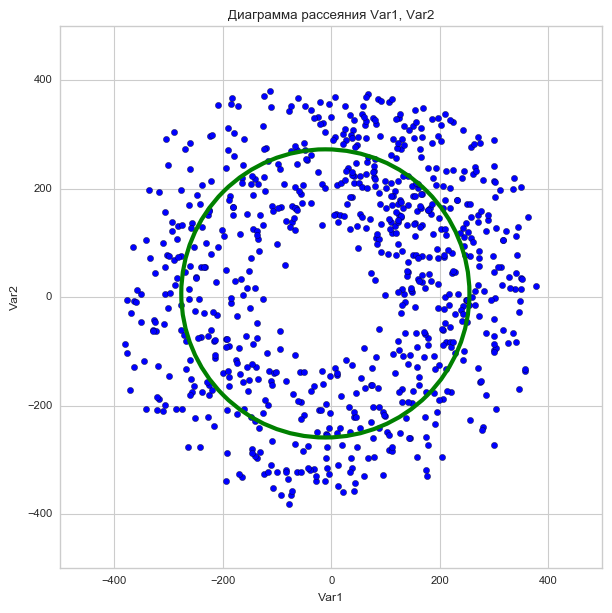

In [63]:
# Вывести диаграмму рассеяния и окружность
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(dataTest1.Var1, dataTest1.Var2)
circle = plt.Circle((xc, yc), R, color='green', linewidth=3, fill=False)
ax.add_artist(circle)
plt.xlabel('Var1')
plt.ylabel('Var2')
plt.title('Диаграмма рассеяния Var1, Var2')

Мат. ожидание = 1.9884094371036554e-13
Среднеквадрат. отклонение = 73.38366075978414


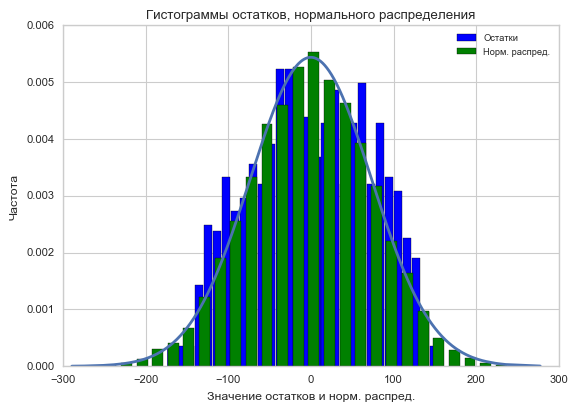

In [83]:
# Вывести гистограмму остатков
fig, ax = plt.subplots()
ax.hist(residual, rwidth=0.9, color='blue', bins=30, normed=True)

mu, sigma = residual.mean(), residual.std()
s = sort(random.normal(mu, sigma, 10000))
ax.hist(s, rwidth=0.7, color='green', bins=30, normed=True)
ax.set_title('Гистограммы остатков, нормального распределения')
ax.set_xlabel('Значение остатков и норм. распред.')
ax.set_ylabel('Частота')
ax.legend(['Остатки', 'Норм. распред.'], fontsize='x-small')
ax.plot(s, 
        1/(sigma * sqrt(2 * pi)) * exp(-(s - mu)**2 / (2 * sigma**2)),
        linewidth = 2)
print('Мат. ожидание = ' + str(mu),
      'Среднеквадрат. отклонение = ' + str(sigma),
      sep='\n')

Гистограмма остатков наиболее близка к гистограмме случайной величины распределенной по нормальному закону распределения.

In [84]:
# Проверка гипотезы, что остатки имеют нормальное распределение
stats.ks_2samp(residual, s)

Ks_2sampResult(statistic=0.050518749999999946, pvalue=0.050727384113995376)

Наименьший уровень значимости, при котором можно отвергнуть нулевую гипотезу о том, что остатки имеют нормальное распределение, 0.05.

## Результат по Тест 1
Нелинейная зависимость между Var1 и Var2, которую можно представить:

(Var1 + 10.8)^2 + (Var2 - 6.7)^2 = (265.6)^2 + N(0, 73.4)

где N - случайная величина, распределенная по нормальному закону распределения.

# Тест 2

In [86]:
# Считать данные
files = [x for x in os.listdir('test2/')]

dataTest2 = pd.read_table('test2/'+files[0], names=['Var1'])
for i in range(1,len(files)):
    # Считать очередной файл
    dataTest2 = pd.DataFrame.join(dataTest2, pd.read_table('test2/'+files[i], names=['Var'+str(i+1)]))

# Показать часть данных для проверки корректности загрузки
print(dataTest2.head())

       Var1      Var2      Var3
0  0.027593  0.062229 -0.010259
1  0.017804  0.060156  0.021178
2 -0.002635  0.072210  0.023754
3 -0.007030  0.056568  0.015148
4  0.013478  0.052922 -0.003445


In [11]:
# Вывести статистику
dataTest2.describe()

,Var1,Var2,Var3
count,321.000000,321.000000,321.000000
mean,0.011310,0.014925,-0.011528
std,0.029182,0.025406,0.063477
min,-0.156365,-0.099207,-0.342662
25%,-0.004022,-0.001933,-0.043679
50%,0.012870,0.014238,-0.007134
75%,0.027700,0.030058,0.024480
max,0.119512,0.082934,0.313821


Переменные Var1 и Var2 имеют схожие характеристики. Имеет смысл проверить принадлежность переменных одним и тем же законам распределения.

In [12]:
# Проверка гипотезы совпадают ли распредления
distr12 = stats.ks_2samp(dataTest2.Var1, dataTest2.Var2)
distr23 = stats.ks_2samp(dataTest2.Var2, dataTest2.Var3)
distr13 = stats.ks_2samp(dataTest2.Var1, dataTest2.Var3)
print('Var1 и Var2 : ' + 'statistic=' + str(distr12.statistic) + ', pvalue=' + str(distr12.pvalue),
      'Var2 и Var3 : ' + 'statistic=' + str(distr23.statistic) + ', pvalue=' + str(distr23.pvalue),
      'Var1 и Var3 : ' + 'statistic=' + str(distr13.statistic) + ', pvalue=' + str(distr13.pvalue),
      sep='\n'
     )

Var1 и Var2 : statistic=0.0623052959502, pvalue=0.548452407008
Var2 и Var3 : statistic=0.352024922118, pvalue=4.70515939866e-18
Var1 и Var3 : statistic=0.311526479751, pvalue=3.12869635739e-14


Для переменных Var1 и Var2 нельзя отвергнуть гипотезу, что они имеют одинаковое распределение.

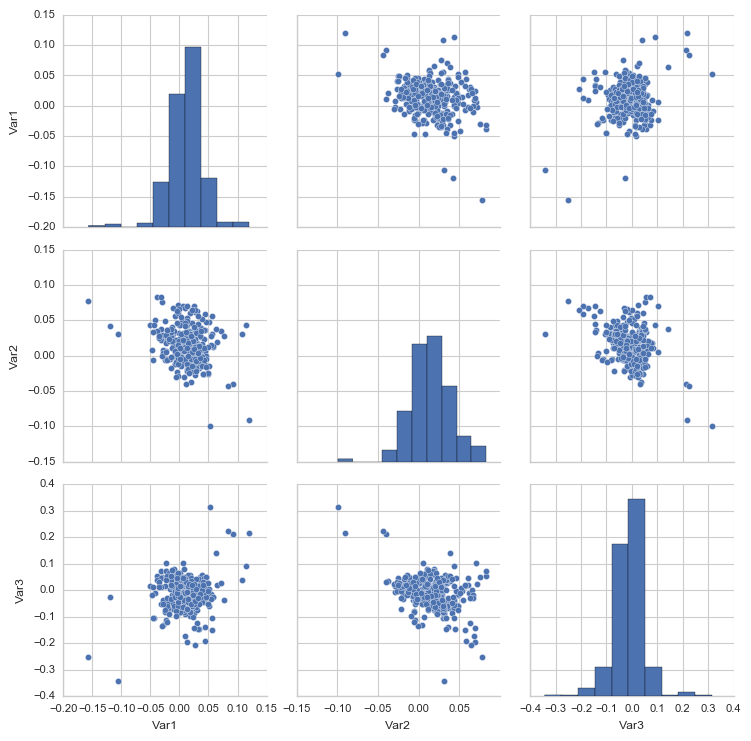

In [13]:
# Построить диаграммы рассеяния
sns.pairplot(dataTest2)

При большом количестве точек трудно определить где сконцентрировано меньшее количество точек, а где большее, поэтому лучше построить диаграммы, показывающие концентрацию точек.

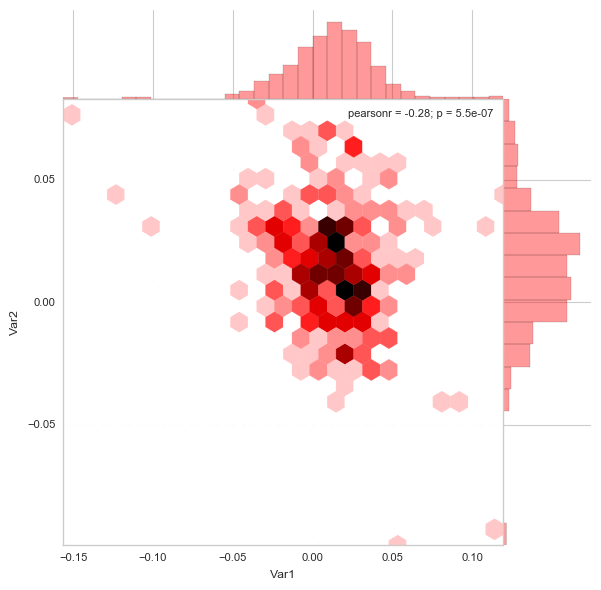

In [15]:
# Укрупненно построить диаграммы рассеяния
from scipy.stats import pearsonr, spearmanr
g = sns.jointplot(dataTest2.Var1, dataTest2.Var2, kind='hex', 
                  color='red', size=6, space=0)

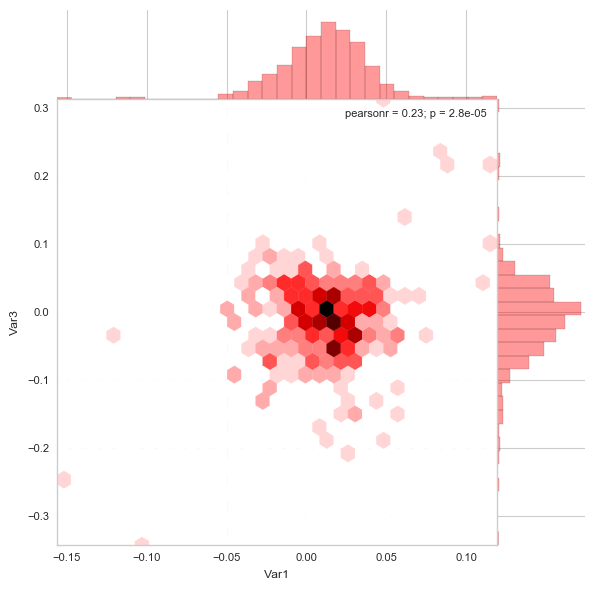

In [16]:
g = sns.jointplot(dataTest2.Var1, dataTest2.Var3, kind='hex',
                  color='red', size=6, space=0)

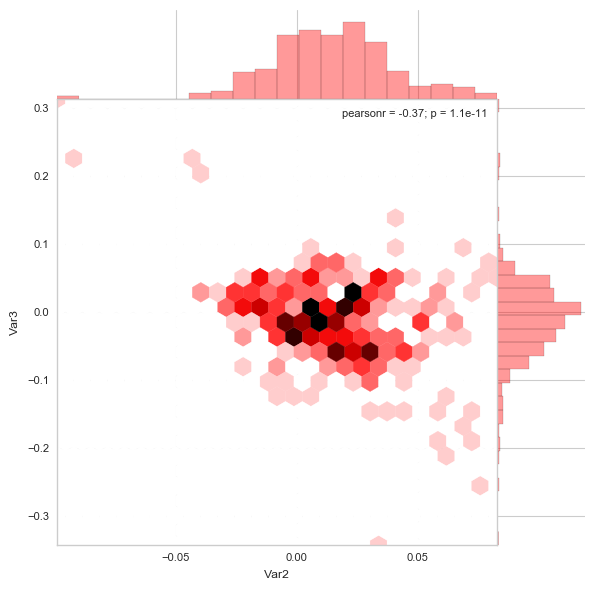

In [17]:
g = sns.jointplot(dataTest2.Var2, dataTest2.Var3, kind='hex',
                  color='red', size=6, space=0)

Наименьшую взаимосвязь показывают Var1 и Var2.

In [87]:
# Вывести корреляционную матрицу
corrCoef = dataTest2.corr(method='pearson')
corrCoef.style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [90]:
# Функция для расчета значимости (частного) коэффициента корреляции
def signCorr(corr, n, alpha=0.005):
    stat = (corr * (n-2)**0.5) / ((1 - corr**2)**0.5)
    tStudent = stats.t.ppf(1-(alpha/2), n)
    if abs(stat) > tStudent:
        return 'Значим для уровня значимости = ' + str(alpha)
    return 'Не значим для уровня значимости = ' + str(alpha)

In [91]:
# Рассчитать значимость коэффициентов корреляции
print('Коэффициент корреляция Var1 и Var2 = ' + 
      str(corrCoef['Var1'][1]) + ' : ' +
      signCorr(corrCoef['Var1'][1], len(dataTest2.Var1)-2),
      'Коэффициент корреляция Var2 и Var3 = ' + 
      str(corrCoef['Var2'][2]) + ' : ' +
      signCorr(corrCoef['Var2'][2], len(dataTest2.Var1)-2),
      'Коэффициент корреляция Var1 и Var3 = ' + 
      str(corrCoef['Var1'][2]) + ' : ' +
      signCorr(corrCoef['Var1'][2], len(dataTest2.Var1)-2),
      sep='\n'
     )

Коэффициент корреляция Var1 и Var2 = -0.275130228001 : Значим для уровня значимости = 0.005
Коэффициент корреляция Var2 и Var3 = -0.367363131736 : Значим для уровня значимости = 0.005
Коэффициент корреляция Var1 и Var3 = 0.23157399156 : Значим для уровня значимости = 0.005


In [92]:
# Функция для расчета частного коэффициента корреляции
def partialCorr(v1, v2, v3):
    return (v1 - v2 * v3) / (((1-v2**2)*(1-v3**2))**0.5)

In [93]:
# Рассчитать частные коэффициенты корреляции
pCorr12 = partialCorr(corrCoef['Var1'][1], corrCoef['Var1'][2], corrCoef['Var2'][2])
pCorr23 = partialCorr(corrCoef['Var2'][2], corrCoef['Var2'][0], corrCoef['Var3'][0])
pCorr13 = partialCorr(corrCoef['Var1'][2], corrCoef['Var1'][1], corrCoef['Var3'][1])
print('Частный коэффициент корреляция Var1 и Var2 = ' + 
      str(pCorr12) + ' : ' +
      signCorr(pCorr12, len(dataTest2.Var1)),
      'Частный коэффициент корреляция Var2 и Var3 = ' + 
      str(pCorr23) + ' : ' +
      signCorr(pCorr23, len(dataTest2.Var1)),
      'Частный коэффициент корреляция Var1 и Var3 = ' + 
      str(pCorr13) + ' : ' +
      signCorr(pCorr13, len(dataTest2.Var1)),
      sep='\n'
     )

Частный коэффициент корреляция Var1 и Var2 = -0.210056821867 : Значим для уровня значимости = 0.005
Частный коэффициент корреляция Var2 и Var3 = -0.32466458602 : Значим для уровня значимости = 0.005
Частный коэффициент корреляция Var1 и Var3 = 0.145944709173 : Не значим для уровня значимости = 0.005


## Результат по Тест 2
Между переменными Var1, Var2, Var3 слабая парная линейная взаимосвязь. Взаимосвязью между Var1 и Var3 можно пренебречь, поскольку частный коэффициент корреляции не значим для уровня значимости 0.005, однако это можно сделать только с учетом смысла переменных.

Поскольку не известен смысл переменных, то нельзя предположить направление связи, т.е. что является объясняющей, а что объясняемой переменными. Также без понимания смысла переменых нельзя однозначно утверждать о наличии взаимосвязи. Также уравнение линии регрессии имеет смысл только при определении объясняемой переменной.

# Тест 3

In [2]:
# Считать данные из файла
dataTest3 = pd.read_table('text3.txt', sep=' ', header=None)

# Удалить последний столбец (при загрузке также был добавлен столбец с пустыми значениями)
dataTest3.drop(dataTest3.columns[len(dataTest3.columns)-1], axis=1, inplace=True)

In [3]:
# Проверить корректность загрузки
print('Количество строк x Количество столбцов = ' + str(dataTest3.shape))

Количество строк x Количество столбцов = (10000, 10000)


In [4]:
# Вывести пример столбца
print(dataTest3[0].head(20))

0     50
1     50
2     50
3     50
4     50
5     50
6     50
7     50
8     50
9     51
10    51
11    51
12    51
13    51
14    51
15    51
16    51
17    52
18    52
19    52
Name: 0, dtype: int64


In [5]:
# Вывести пример строки
print(dataTest3.iloc[0].head(20))

0     50
1     50
2     50
3     50
4     50
5     50
6     50
7     50
8     50
9     50
10    50
11    50
12    50
13    50
14    50
15    50
16    50
17    50
18    50
19    50
Name: 0, dtype: int64


In [6]:
# Определить какие уникальные числа есть в данных. Какие позиции (i-строка, j-столбец) им соответствуют
# Перевести все данные в строку
flatDataTest3 = dataTest3.values.flatten()

# Найти все уникальные данные
uniqueValues = unique(flatDataTest3)

# Вывести все уникальные данные
print(uniqueValues)

[28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57 58 59 60 61]


In [11]:
# Записать все позиции для уникальных значений
positions = {}
for i in range(len(uniqueValues)):
    positions[uniqueValues[i]] = where(dataTest3.values == uniqueValues[i])

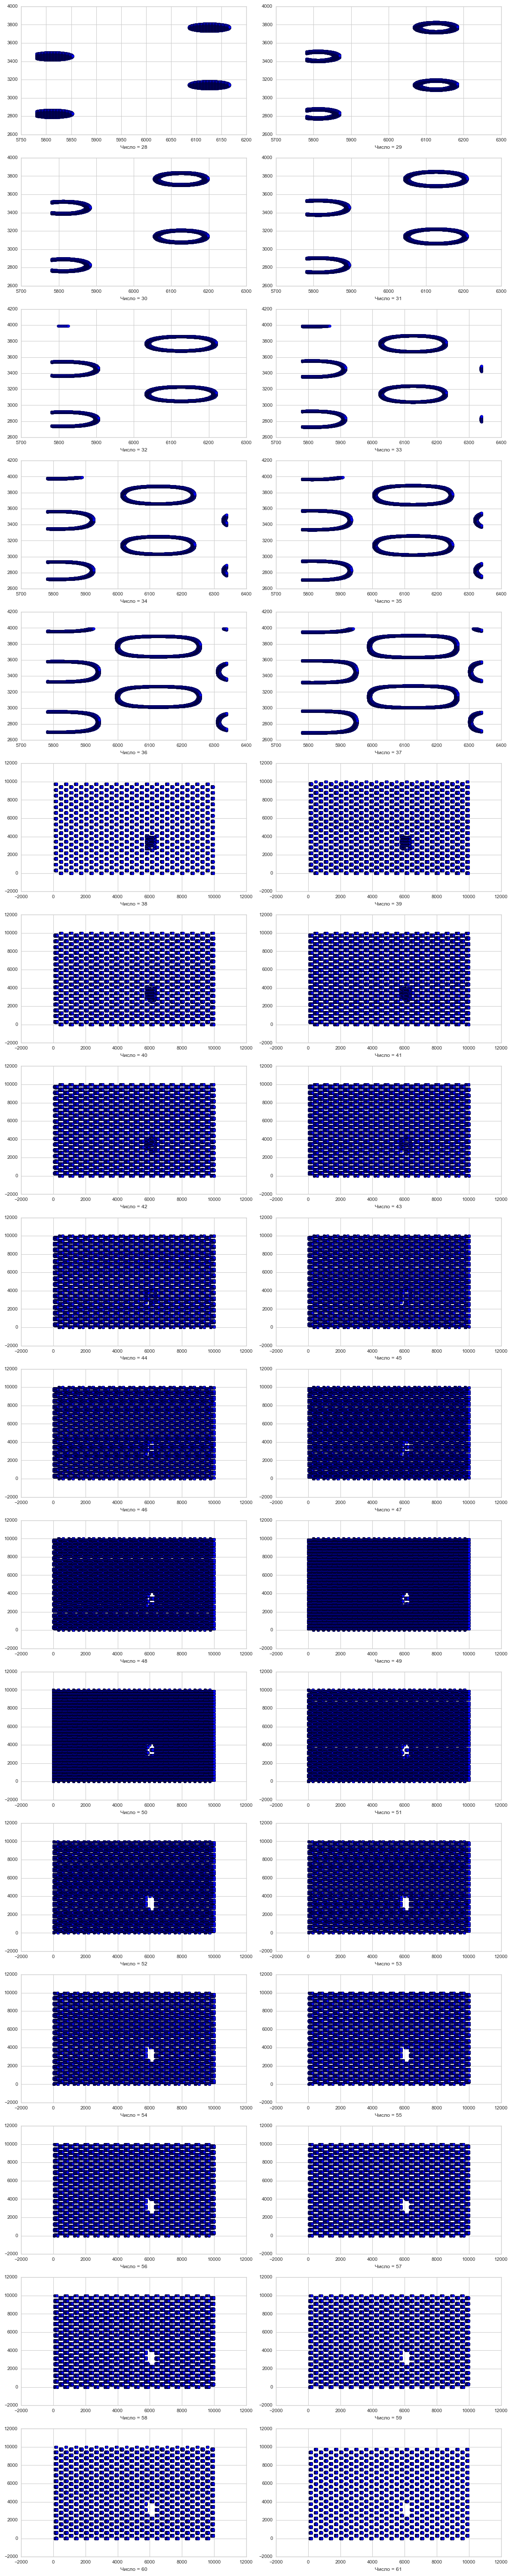

In [57]:
# Вывести диаграммы рассеяния номеров позиций для каждого уникального значения
cols = 2
rows = (len(uniqueValues) + 1) // cols
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 60))
i, j = 0, 0
for el in uniqueValues:
    ax[i, j].scatter(positions[el][0], positions[el][1])
    ax[i, j].set_xlabel('Число = ' + str(el))
    j += 1
    if j % 2 == 0:
        j = 0
        i += 1

fig.tight_layout()

In [98]:
# Убрать дубли строк
dataTest3_Trunc = dataTest3.drop_duplicates()

In [99]:
# Убрать дубли столбцов
dataTest3_Trunc = dataTest3_Trunc.T.drop_duplicates().T

In [100]:
# Вывести количество неповторяющихся строк и столбцов
print(dataTest3_Trunc.shape)

(9145, 9014)


## Результат по Тест 3
Данные в файле состоят из 34 чисел, расположение которых носит в основном периодический характер, однако полностью повторяющихся строк и столбцов около 10%.

Числа 38-61 распределены по индексам 0-10000 как по горизонтали, так и по вертикали, в то время как числа 28-37 занимают меньший участок индексов: 5750-6400 по горизонтали, 2600-4000 по вертикали. Числа 28-37 размещены по линиям, представляющих собой эллипсы/ близких к эллипсам.